# Problem: Sentiment Classification on IMDB movie review
Problem Statement:
In this notebook, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

Key things:


*   Load the dataset
*   Pre-process dataset (cleaning, lemmatization, tokenization)
*   Decide which classification models to test of. See the metrics for diffenrent classification models. Design experiment, and write detailed technical report.
*   Logistic Regression, Random Forest, SVC, SVM, LSTM + attention, transformer model (RoBERTa)
*   Main Objective: Learn different classifiers, reasoning on their merit and pros and cons.
*   Apply different advanced level optimization (batch gradiet, adam, regularization etc)



# Dataset Description:
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. It has 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
[http://ai.stanford.edu/~amaas/data/sentiment/](http://ai.stanford.edu/~amaas/data/sentiment/)

In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
input_path = '/content/drive/MyDrive/Sentiment_Data/IMDB Dataset.csv'
#importing the training data
imdb_data=pd.read_csv(input_path)
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
#sentiment count
imdb_data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


# Data Analysis:


In [ ]:
#split the dataset
#train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


Number of characters in Review


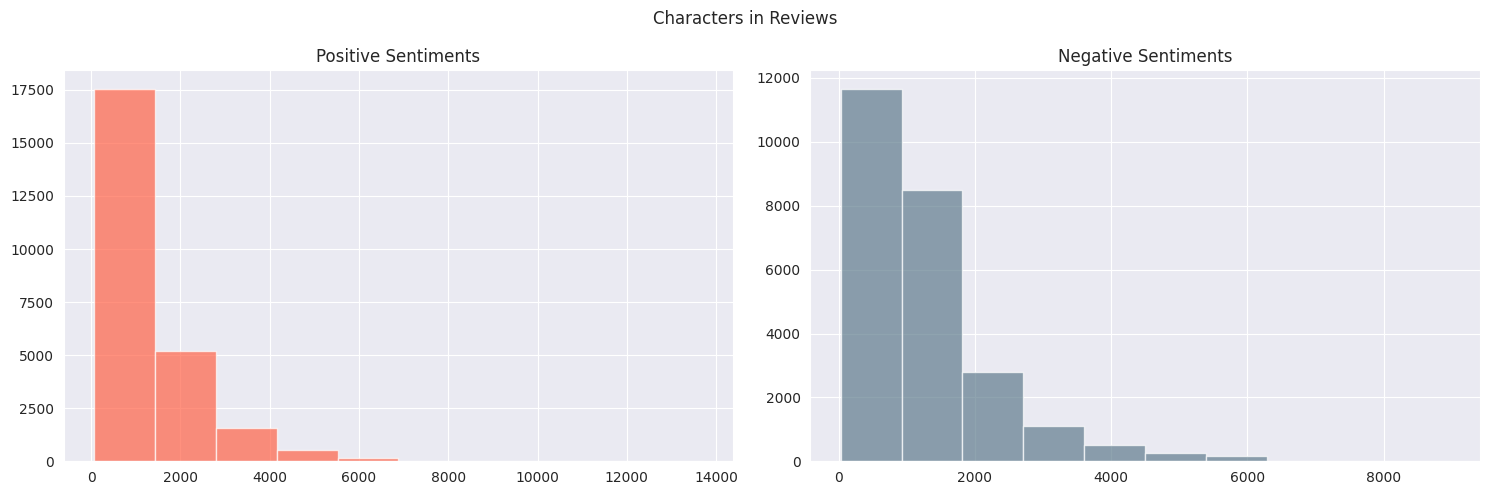

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('darkgrid')
n_bins =10
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len=imdb_data[imdb_data['sentiment']=='positive']['review'].str.len()
ax1.hist(tweet_len,color='tomato',bins=n_bins,alpha = 0.7)
ax1.set_title('Positive Sentiments')
tweet_len=imdb_data[imdb_data['sentiment']=='negative']['review'].str.len()
ax2.hist(tweet_len,bins=n_bins,color ='#607c8e', alpha = 0.7)
ax2.set_title('Negative Sentiments')
fig.suptitle('Characters in Reviews')
plt.tight_layout()
plt.show()

Number of Words in reviews

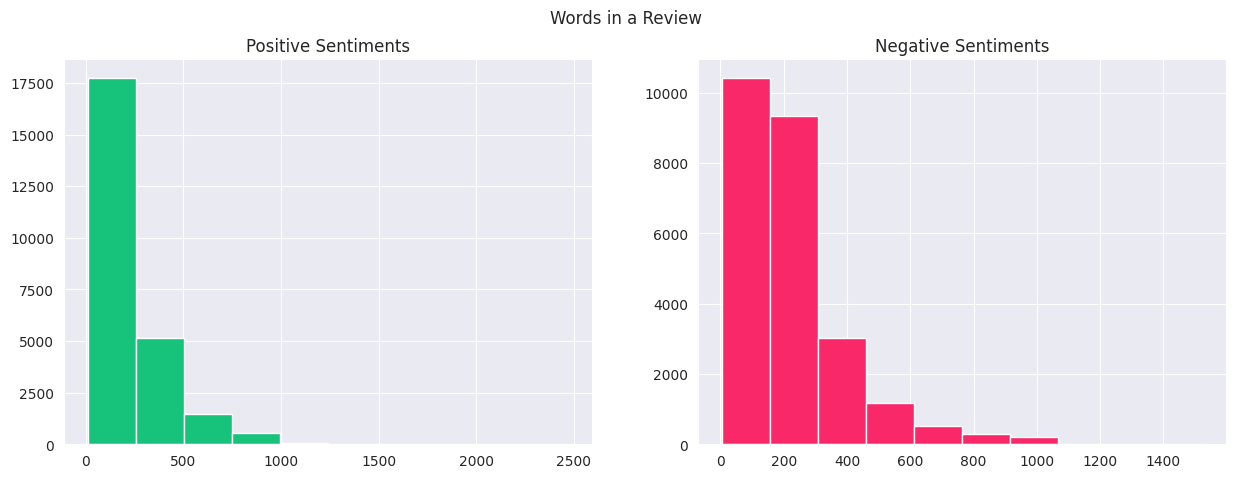

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len=imdb_data[imdb_data['sentiment']=='positive']['review'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')
tweet_len=imdb_data[imdb_data['sentiment']=='negative']['review'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')
fig.suptitle('Words in a Review')
plt.show()


Observation: Given the word count distributions:

For Positive reviews: 17500 out of 25000 have 0-250 words. 5000 has 250-500 words, 1250 has 500 - 750 words and rest has 750-1000 words

Negative Reviews: little above 10000 out of 25000 have 0-150 words. 9000 has 200-400 words, 3000 has 400-600 words and rest has 600- 1100 words

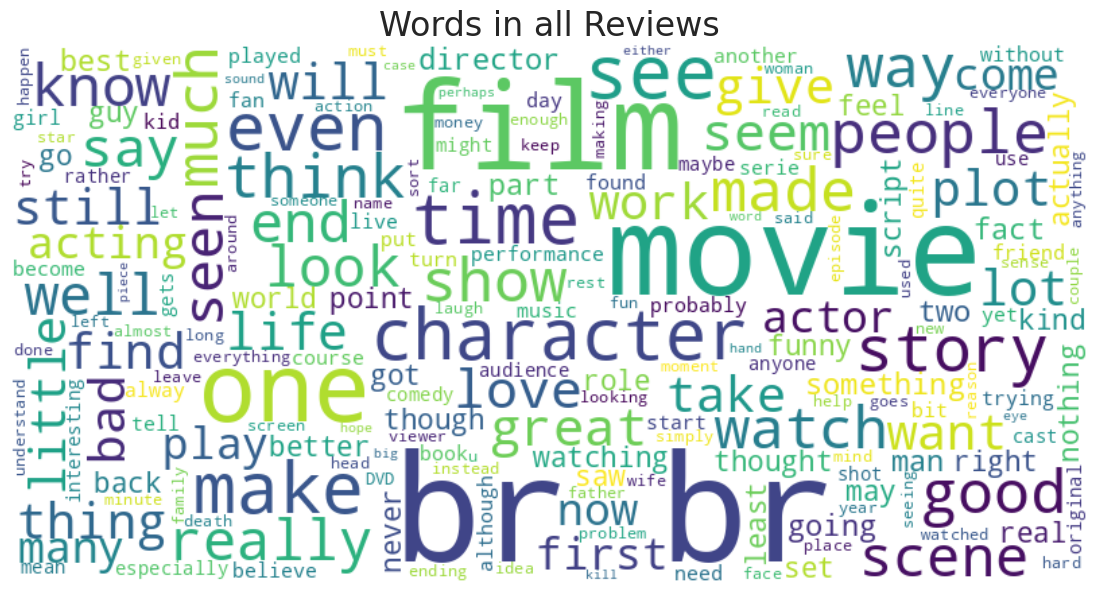

In [ ]:
from wordcloud import WordCloud
words = ' '.join([text for text in imdb_data['review']])
wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_font_size=110)\
    .generate(words)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Words in all Reviews', fontsize=24)
plt.axis('off')
plt.show()

# Data Cleanup and Preprocessing
Data cleaning is a task of removing unwanted data that could affect our final prediction as well removing null values. Null values are basically "no value" as in no value is maintained for a specific field. Data cleaning includes:

* Removing Null values
* Removing duplicate values
* Lowering text to normalize the text
* Removing Punctuations from string. (Punctuations - !"#$\%&'()*+,-./:;<=>?@[\]^_`{|}~)
* Removing stopwords from string. Stopwords are words which are present in abundance in string and can be tricky for some models to learn from the words which have higher impact. For example "in", "at", "the", "a",etc.






In [ ]:
imdb_data[imdb_data['review'].duplicated() == True]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [ ]:
imdb_data.drop_duplicates(subset='review', inplace=True)
imdb_data.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,No one expects the Star Trek movies to be high...,positive
freq,1,24884


In [ ]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

# Download required NLTK resources and load spaCy model
def load_language_resources():
    """Download necessary NLTK resources and load spaCy model."""
    try:
        nltk.data.find('tokenizers/punkt')
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('punkt')
        nltk.download('stopwords')

    # Load spaCy model
    try:
        nlp = spacy.load('en_core_web_sm')
    except OSError:
        print("Downloading spaCy model...")
        spacy.cli.download('en_core_web_sm')
        nlp = spacy.load('en_core_web_sm')

    return nlp

def remove_html_tags(text):
    """Remove HTML tags from text."""
    return re.sub('<.*?>', ' ', text)

def remove_special_chars(text):
    """Remove special characters and punctuation."""
    return re.sub('\W', ' ', text)

def remove_single_chars(text):
    """Remove single characters."""
    return re.sub('\s+[a-zA-Z]\s+', ' ', text)

def standardize_whitespace(text):
    """Replace multiple spaces with single space."""
    return re.sub('\s+', ' ', text)

def process_with_spacy(text, nlp, remove_stops=True):
    """Process text with spaCy and return lemmatized tokens.

    Args:
        text: Text to process
        nlp: spaCy language model
        remove_stops: Whether to remove stopwords

    Returns:
        tuple: (lemmatized_text, list_of_lemmas)
    """
    doc = nlp(text)

    # Get lemmas, ignoring stopwords if requested
    if remove_stops:
        tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.lemma_.strip()]
    else:
        tokens = [token.lemma_.lower() for token in doc if token.lemma_.strip()]

    # Join tokens into a single string
    lemmatized_text = " ".join(tokens)

    return lemmatized_text, tokens

def preprocess_text(text, nlp):
    """Apply all preprocessing steps to a single text."""
    text = remove_html_tags(text)
    text = remove_special_chars(text)
    text = remove_single_chars(text)
    text = standardize_whitespace(text)

    # Use spaCy for lemmatization and stopword removal
    lemmatized_text, tokens = process_with_spacy(text, nlp)

    return lemmatized_text, tokens

def preprocess_dataset(df, text_column='review', max_rows=None):
    """Preprocess text data from a DataFrame column.

    Args:
        df: Pandas DataFrame containing the text data
        text_column: Name of the column containing text to process
        max_rows: Maximum number of rows to process (None for all rows)

    Returns:
        DataFrame with processed text and lemmatized tokens
    """
    # Load language resources
    nlp = load_language_resources()

    # Determine how many rows to process
    num_rows = len(df) if max_rows is None else min(max_rows, len(df))

    # Create a working copy with only the rows we need
    working_df = df.head(num_rows).copy().reset_index(drop=True)

    processed_reviews = []
    lemmatized_tokens = []

    print(f"Processing {num_rows} reviews...")
    for i in range(len(working_df)):
        if i % 1000 == 0 and i > 0:
            print(f"Processed {i} reviews...")

        text = working_df.loc[i, text_column]
        processed_text, tokens = preprocess_text(text, nlp)
        processed_reviews.append(processed_text)
        lemmatized_tokens.append(tokens)

    # Add processed data to the working DataFrame
    working_df['processed_review'] = processed_reviews
    working_df['lemmatized_tokens'] = lemmatized_tokens

    return working_df

def encode_sentiment(df, sentiment_column='sentiment'):
    """Convert sentiment labels to binary values.

    Args:
        df: Pandas DataFrame containing sentiment labels
        sentiment_column: Name of the column containing sentiment data

    Returns:
        Series of encoded sentiments (1 for positive, 0 for negative)
    """
    return df[sentiment_column].apply(lambda x: 1 if x == 'positive' else 0)



In [ ]:
# Preprocess reviews
processed_df = preprocess_dataset(imdb_data, 'review')

# Encode sentiment as a new column
processed_df['label'] = encode_sentiment(processed_df, 'sentiment')

# Display results
#print(processed_df[['review', 'processed_review', 'lemmatized_tokens', 'sentiment', 'label']])

processed_df.head()

In [ ]:
# prompt: take only processed_review and sentiment column and save that df to disk

# Save the DataFrame with 'processed_review' and 'sentiment' columns to disk
processed_df[['processed_review', 'label']].to_csv('/content/drive/MyDrive/Sentiment_Data/processed_reviews.csv', index=False)


# Read Pre-processed Data directly.

In [ ]:
# prompt: generate code to read it back properly in processed_df

import pandas as pd

# Load the preprocessed data
processed_df = pd.read_csv('/content/drive/MyDrive/Sentiment_Data/processed_reviews.csv')

# Now you can work with the 'processed_df' DataFrame
print(processed_df.head())


                                    processed_review  label
0  reviewer mention watch 1 oz episode ll hook ri...      1
1  wonderful little production filming technique ...      1
2  think wonderful way spend time hot summer week...      1
3  basically family little boy jake think zombie ...      0
4  petter mattei love time money visually stunnin...      1


#

In [ ]:
processed_df.head()

,processed_review,label
0,reviewer mention watch 1 oz episode ll hook ri...,1
1,wonderful little production filming technique ...,1
2,think wonderful way spend time hot summer week...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1


 # Tokenization:
* **Bags of words model:**

  It is used to convert text documents to numerical vectors or bag of words.

* **TF-IDF model:**

  Since we have reviews as text and we want to run a mathematical model we need a method to convert the text to numbers. We will use TF-IDF method for this, inorder to know the details about TF-IDF you may read about it here. Note that it contains 50k rows so its a mid-sized database so we expect the TF-IDF based model to work better than deep learning models.

  We will use pre-built TF-IDF vectorizer from sklearn library. Let us create a document term matrix (DTM) using TF-IDF.


TF-IDF Model

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
text_count_matrix = tfidf.fit_transform(processed_df.processed_review)


In [ ]:
#splitting the complete dataset in test and training dataset:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_count_matrix, processed_df.label, test_size=0.30, random_state=2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title, normalize=False, cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'

    sns.heatmap(cm, annot=True, fmt=fmt, cmap=cmap,
                xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Function to plot learning curves to detect overfitting
def plot_learning_curve(estimator, title, X, y, cv=5):
    plt.figure(figsize=(10, 6))
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


IMDB Sentiment Classification with Proper Validation

Extracting features with TF-IDF...
Feature matrix shape: (49582, 586904)
Training set size: 29743 (60.0%)
Validation set size: 4964 (10.0%)
Test set size: 14875 (30.0%)

Performing k-fold cross-validation on training data...
Multinomial Naive Bayes CV Accuracy: 87.19% ± 0.33%
Linear SVC CV Accuracy: 89.32% ± 0.17%
Logistic Regression CV Accuracy: 88.18% ± 0.27%

Training and evaluating models with proper validation...

--------------------------------------------------
Model: Multinomial Naive Bayes
Training time: 0.11 seconds
Training accuracy: 96.20%
Validation accuracy: 89.34%
Test accuracy: 87.70%

Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.90      0.89      2454
    Positive       0.90      0.89      0.89      2510

    accuracy                           0.89      4964
   macro avg       0.89      0.89      0.89      4964
weighted avg       0.89      0

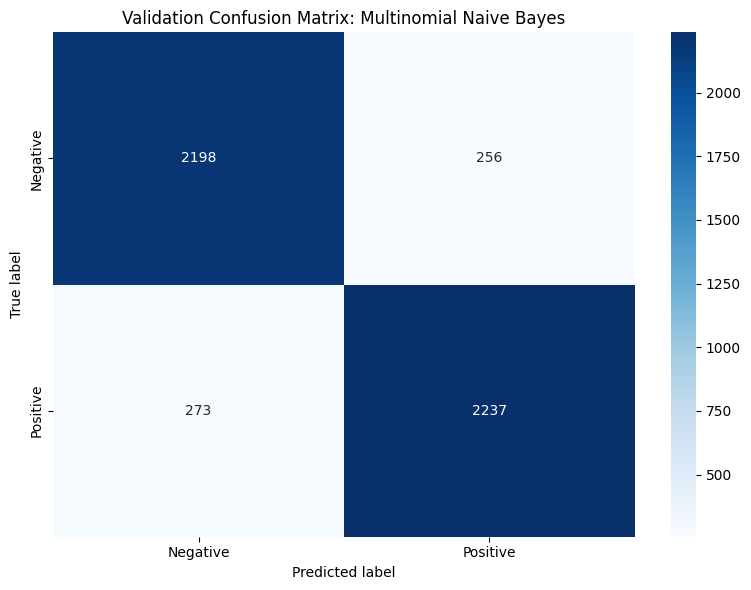

Algorithm converged after 33 iterations

--------------------------------------------------
Model: Linear SVC
Training time: 0.92 seconds
Training accuracy: 99.97%
Validation accuracy: 90.87%
Test accuracy: 89.80%

Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.89      0.91      2454
    Positive       0.90      0.93      0.91      2510

    accuracy                           0.91      4964
   macro avg       0.91      0.91      0.91      4964
weighted avg       0.91      0.91      0.91      4964



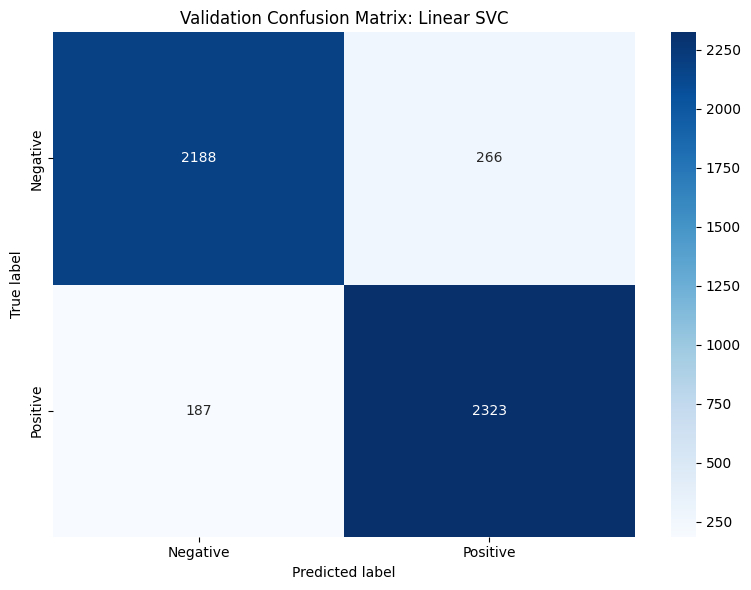

Algorithm converged after [15] iterations

--------------------------------------------------
Model: Logistic Regression
Training time: 3.90 seconds
Training accuracy: 94.72%
Validation accuracy: 90.09%
Test accuracy: 88.44%

Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.88      0.90      2454
    Positive       0.89      0.92      0.90      2510

    accuracy                           0.90      4964
   macro avg       0.90      0.90      0.90      4964
weighted avg       0.90      0.90      0.90      4964



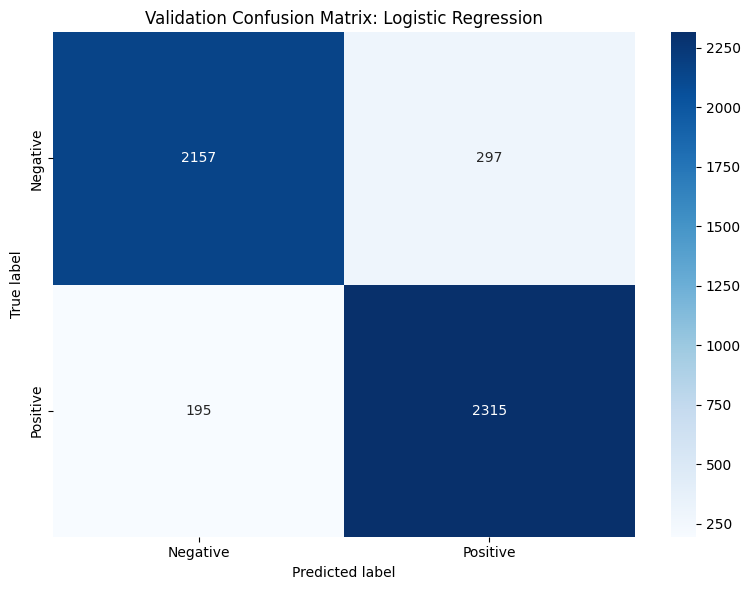


Performing hyperparameter tuning for Linear SVC using validation set...
Parameter tuning results:
Parameters                     Validation Accuracy 
--------------------------------------------------
{'C': np.float64(0.1)}         90.17%
{'C': np.float64(0.5)}         90.77%
{'C': np.float64(1.0)}         90.87%
{'C': np.float64(5.0)}         90.61%
{'C': np.float64(10.0)}        90.53%

Best parameters: {'C': np.float64(1.0)}
Best validation accuracy: 90.87%

Final model test accuracy: 89.80%

Final Classification Report on Test Set:
              precision    recall  f1-score   support

    Negative       0.91      0.88      0.90      7390
    Positive       0.89      0.91      0.90      7485

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875



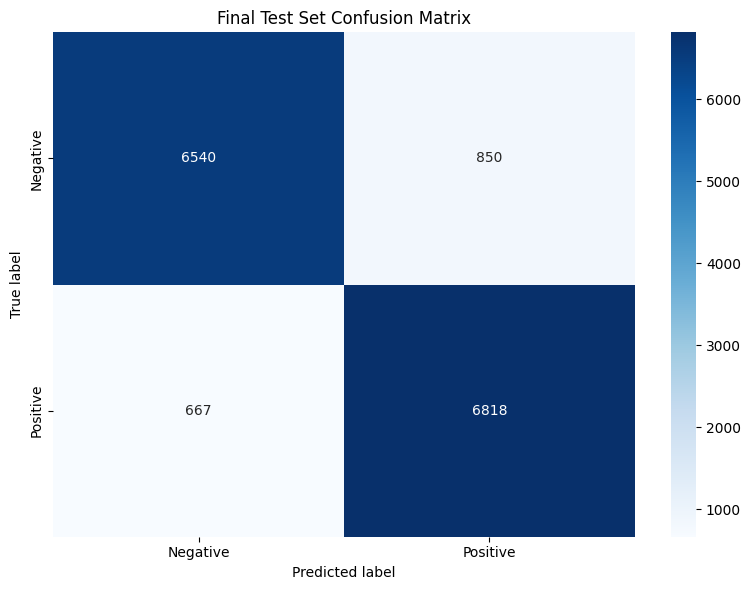

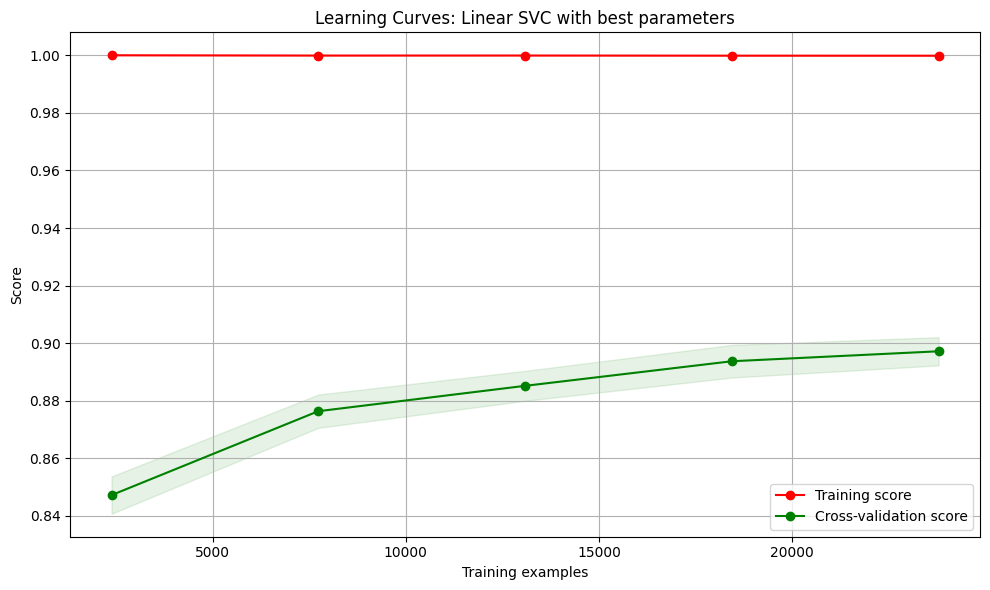

In [ ]:
# Function to evaluate and log model performance
def evaluate_model(model, model_name, X_train, X_val, X_test, y_train, y_val, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    if hasattr(model, 'n_iter_'):
      print(f"Algorithm converged after {model.n_iter_} iterations")
    train_time = time.time() - start_time

    # Training accuracy
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)

    # Validation accuracy
    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)

    # Test accuracy
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Log results
    print(f"\n{'-'*50}")
    print(f"Model: {model_name}")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Training accuracy: {train_accuracy*100:.2f}%")
    print(f"Validation accuracy: {val_accuracy*100:.2f}%")
    print(f"Test accuracy: {test_accuracy*100:.2f}%")

    # Check for overfitting
    if train_accuracy - val_accuracy > 0.05:
        print("WARNING: Possible overfitting detected (training accuracy much higher than validation)")

    # Classification report on validation set
    print("\nValidation Classification Report:")
    print(classification_report(y_val, val_predictions, target_names=['Negative', 'Positive']))

    # Confusion matrix on validation set
    cm = confusion_matrix(y_val, val_predictions)
    plot_confusion_matrix(cm, classes=['Negative', 'Positive'],
                         title=f'Validation Confusion Matrix: {model_name}')

    return model, val_accuracy

# Start of main code
print("IMDB Sentiment Classification with Proper Validation\n")

# Feature extraction
print("Extracting features with TF-IDF...")
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
text_count_matrix = tfidf.fit_transform(processed_df.processed_review)
print(f"Feature matrix shape: {text_count_matrix.shape}")

# Three-way split: train, validation, test (60%, 10%, 30%)
# First split into temporary train and test
X_temp, X_test, y_temp, y_test = train_test_split(
    text_count_matrix, processed_df.label, test_size=0.30, random_state=2)

# Then split the temporary train into actual train and validation
# We want the validation set to be 10% of the total, which is ~14.3% of the temporary train set
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.143, random_state=42)  # 0.143 * 0.7 ≈ 0.1

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/text_count_matrix.shape[0]:.1%})")
print(f"Validation set size: {X_val.shape[0]} ({X_val.shape[0]/text_count_matrix.shape[0]:.1%})")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/text_count_matrix.shape[0]:.1%})")

# K-fold Cross-validation on training data only
print("\nPerforming k-fold cross-validation on training data...")
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Linear SVC': LinearSVC(max_iter=10000),
    'Logistic Regression': LogisticRegression(max_iter=10000)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"{name} CV Accuracy: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100:.2f}%")

# Model training and evaluation with detailed logging
print("\nTraining and evaluating models with proper validation...")
results = {}

for name, model in models.items():
    model, val_accuracy = evaluate_model(model, name, X_train, X_val, X_test, y_train, y_val, y_test)
    results[name] = (model, val_accuracy)

# Hyperparameter tuning using validation set to select best parameters
best_model_name = max(results.items(), key=lambda x: x[1][1])[0]
print(f"\nPerforming hyperparameter tuning for {best_model_name} using validation set...")

if best_model_name == 'Multinomial Naive Bayes':
    param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0]}
    best_model = MultinomialNB()
elif best_model_name == 'Linear SVC':
    param_grid = {'C': [0.1, 0.5, 1.0, 5.0, 10.0]}
    best_model = LinearSVC(max_iter=10000)
else:  # Logistic Regression
    param_grid = {'C': [0.1, 0.5, 1.0, 5.0, 10.0], 'solver': ['liblinear', 'saga']}
    best_model = LogisticRegression(max_iter=10000)

# Manual grid search using separate validation set
best_val_accuracy = 0
best_params = None
best_tuned_model = None

print("Parameter tuning results:")
print(f"{'Parameters':<30} {'Validation Accuracy':<20}")
print("-" * 50)

for params in [dict(zip(param_grid.keys(), v)) for v in np.array(np.meshgrid(*param_grid.values())).T.reshape(-1, len(param_grid.keys()))]:
    # Create and train model with current parameters
    if best_model_name == 'Multinomial Naive Bayes':
        model = MultinomialNB(**params)
    elif best_model_name == 'Linear SVC':
        model = LinearSVC(max_iter=10000, **params)
    else:
        model = LogisticRegression(max_iter=10000, **params)

    # Train on training set
    model.fit(X_train, y_train)

    # Evaluate on validation set
    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)

    # Print current results
    print(f"{str(params):<30} {val_accuracy*100:.2f}%")

    # Keep track of best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_params = params
        best_tuned_model = model

print(f"\nBest parameters: {best_params}")
print(f"Best validation accuracy: {best_val_accuracy*100:.2f}%")

# Final evaluation of the best tuned model on the test set
final_predictions = best_tuned_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"\nFinal model test accuracy: {final_accuracy*100:.2f}%")

print("\nFinal Classification Report on Test Set:")
print(classification_report(y_test, final_predictions, target_names=['Negative', 'Positive']))

# Final confusion matrix
final_cm = confusion_matrix(y_test, final_predictions)
plot_confusion_matrix(final_cm, classes=['Negative', 'Positive'],
                     title='Final Test Set Confusion Matrix')

# Plot learning curves for the best model to check for overfitting
plot_learning_curve(best_tuned_model, f'Learning Curves: {best_model_name} with best parameters',
                   X_train, y_train)

In [ ]:
# let's use Naive Bayes classifier and fit our model:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(x_train, y_train)
#4. Evaluating the model
from sklearn import metrics
accuracy_score = metrics.accuracy_score(MNB.predict(x_test), y_test)
print("accuracy_score with data pre-processing = " + str('{:04.2f}'.format(accuracy_score*100))+" %")

accuracy_score with data pre-processing = 87.52 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report: \n", classification_report(y_test, MNB.predict(x_test),target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, MNB.predict(x_test)))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.87      0.88      0.87      7390
    Positive       0.88      0.87      0.88      7485

    accuracy                           0.88     14875
   macro avg       0.88      0.88      0.88     14875
weighted avg       0.88      0.88      0.88     14875

Confusion Matrix: 
 [[6487  903]
 [ 953 6532]]


In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
LSVC.fit(x_train, y_train)
accuracy_score = metrics.accuracy_score(LSVC.predict(x_test), y_test)
print("Linear SVC accuracy = " + str('{:04.2f}'.format(accuracy_score*100))+" %")
print("Classification Report: \n", classification_report(y_test, LSVC.predict(x_test),target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, LSVC.predict(x_test)))

Linear SVC accuracy = 90.15 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      7390
    Positive       0.89      0.92      0.90      7485

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875

Confusion Matrix: 
 [[6557  833]
 [ 632 6853]]


In [ ]:
SGDC = SGDClassifier()
SGDC.fit(x_train, y_train)
predict = SGDC.predict(x_test)
accuracy_score = metrics.accuracy_score(predict, y_test)
print("Stocastic Gradient Classifier accuracy = " + str('{:04.2f}'.format(accuracy_score*100))+" %")
print("Classification Report: \n", classification_report(y_test, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, predict))

Stocastic Gradient Classifier accuracy = 88.85 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.86      0.88      7390
    Positive       0.87      0.92      0.89      7485

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875

Confusion Matrix: 
 [[6358 1032]
 [ 626 6859]]


In [ ]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predict = LR.predict(x_test)
accuracy_score = metrics.accuracy_score(predict, y_test)
print("LR = " + str('{:04.2f}'.format(accuracy_score*100))+" %")
print("Classification Report: \n", classification_report(y_test, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, predict))

LR = 88.75 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.90      0.87      0.88      7390
    Positive       0.87      0.91      0.89      7485

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875

Confusion Matrix: 
 [[6409  981]
 [ 692 6793]]
